In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.integrate as spi
import numpy as np
import pylab as pl

In [2]:
#read in data of infected and recovered coronavirus cases from csv files
infectedData = pd.read_csv("time_series_covid_19_confirmed.csv")
recoveredData = pd.read_csv("time_series_covid_19_recovered.csv")

In [3]:
#create dataframe for infected cases data
infectedDataFrame = pd.DataFrame(infectedData)
infectedDataFrame

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20
0,Anhui,Mainland China,31.82571,117.2264,1,9,15,39,60,70,...,860,889,910,934,950,962,973,982,986,987
1,Beijing,Mainland China,40.18238,116.4142,14,22,36,41,68,80,...,342,352,366,372,375,380,381,387,393,395
2,Chongqing,Mainland China,30.05718,107.8740,6,9,27,57,75,110,...,505,518,529,537,544,551,553,555,560,567
3,Fujian,Mainland China,26.07783,117.9895,1,5,10,18,35,59,...,267,272,279,281,285,287,290,292,293,293
4,Gansu,Mainland China,36.06110,103.8343,0,2,2,4,7,14,...,86,87,90,90,90,90,91,91,91,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Diamond Princess cruise ship,Others,35.44370,139.6380,0,0,0,0,0,0,...,135,175,175,218,285,355,454,542,621,634
72,"San Diego County, CA",US,32.71570,-117.1611,0,0,0,0,0,0,...,1,1,2,2,2,2,2,2,2,2
73,"San Antonio, TX",US,29.42410,-98.4936,0,0,0,0,0,0,...,0,0,1,1,1,1,1,1,1,1
74,NaN,Egypt,26.82060,30.8025,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,1,1


In [4]:
#unique values of Country/Region feature
infectedDataFrame["Country/Region"].unique()

array(['Mainland China', 'Thailand', 'Japan', 'South Korea', 'Taiwan',
       'US', 'Macau', 'Hong Kong', 'Singapore', 'Vietnam', 'France',
       'Nepal', 'Malaysia', 'Canada', 'Australia', 'Cambodia',
       'Sri Lanka', 'Germany', 'Finland', 'United Arab Emirates',
       'Philippines', 'India', 'Italy', 'UK', 'Russia', 'Sweden', 'Spain',
       'Belgium', 'Others', 'Egypt', 'Iran'], dtype=object)

In [5]:
#count number of occurrances of each value
infectedDataFrame["Country/Region"].value_counts()

Mainland China          31
US                      11
Australia                4
Canada                   3
Macau                    1
Hong Kong                1
Cambodia                 1
South Korea              1
Italy                    1
Vietnam                  1
Singapore                1
Japan                    1
Thailand                 1
Germany                  1
Iran                     1
Egypt                    1
Taiwan                   1
Others                   1
India                    1
United Arab Emirates     1
Nepal                    1
Russia                   1
Malaysia                 1
Sweden                   1
France                   1
Spain                    1
Belgium                  1
Finland                  1
Sri Lanka                1
Philippines              1
UK                       1
Name: Country/Region, dtype: int64

In [6]:
#individual data entries for the country Mainland China
infectedDataFrame.loc[infectedDataFrame['Country/Region'] == 'Mainland China']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20
0,Anhui,Mainland China,31.82571,117.22640,1,9,15,39,60,70,...,860,889,910,934,950,962,973,982,986,987
1,Beijing,Mainland China,40.18238,116.41420,14,22,36,41,68,80,...,342,352,366,372,375,380,381,387,393,395
2,Chongqing,Mainland China,30.05718,107.87400,6,9,27,57,75,110,...,505,518,529,537,544,551,553,555,560,567
3,Fujian,Mainland China,26.07783,117.98950,1,5,10,18,35,59,...,267,272,279,281,285,287,290,292,293,293
4,Gansu,Mainland China,36.06110,103.83430,0,2,2,4,7,14,...,86,87,90,90,90,90,91,91,91,91
5,Guangdong,Mainland China,23.33841,113.42200,26,32,53,78,111,151,...,1177,1219,1241,1261,1294,1316,1322,1328,1331,1332
6,Guangxi,Mainland China,23.82908,108.78810,2,5,23,23,36,46,...,215,222,222,226,235,237,238,242,244,245
7,Guizhou,Mainland China,26.81536,106.87480,1,3,3,4,5,7,...,127,133,135,140,143,144,146,146,146,146
8,Hainan,Mainland China,19.19673,109.74550,4,5,8,19,22,33,...,144,157,157,159,162,162,163,163,168,168
9,Hebei,Mainland China,38.04280,114.51490,1,1,2,8,13,18,...,239,251,265,283,291,300,301,306,306,307


In [7]:
dayLabel = infectedDataFrame.columns

In [8]:
#list of dates
dayLabel = dayLabel[4: len(infectedDataFrame.columns)]

In [9]:
#for each day, sum the total number of infected coronavirus cases for Mainland China
#note that this is a cummulative total of all infected cases of the coronavirus on that day--not newly infected cases of that day
for day in dayLabel:
  print(infectedDataFrame.loc[infectedDataFrame['Country/Region'] == 'Mainland China'][day].sum())

547
639
916
1399
2062
2863
5494
6070
8124
9783
11871
16607
19693
23680
27409
30553
34075
36778
39790
42306
44327
44699
59832
66292
68347
70446
72364
74139
74546
74999


In [10]:
data = []
#put data sum for each day into array
for day in dayLabel:
  dayData = [day, infectedDataFrame.loc[infectedDataFrame['Country/Region'] == 'Mainland China'][day].sum()]
  data.append(dayData)

#dataframe for the cummulative number of infected coronavirus cases by day
finalDataFrame = pd.DataFrame(data, columns = ['Date', 'Infected'])
finalDataFrame

,Date,Infected
0,1/22/20,547
1,1/23/20,639
2,1/24/20,916
3,1/25/20,1399
4,1/26/20,2062
5,1/27/20,2863
6,1/28/20,5494
7,1/29/20,6070
8,1/30/20,8124
9,1/31/20,9783


In [11]:
#create dataframe for recovered cases data
recoveredDataFrame = pd.DataFrame(recoveredData)
recoveredDataFrame

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20
0,Anhui,Mainland China,31.82571,117.2264,0,0,0,0,0,0,...,105,127,157,193,221,255,280,361,413,474
1,Beijing,Mainland China,40.18238,116.4142,0,0,1,2,2,2,...,48,56,69,80,98,108,114,122,145,153
2,Chongqing,Mainland China,30.05718,107.8740,0,0,0,0,0,0,...,79,102,128,152,184,207,225,254,274,299
3,Fujian,Mainland China,26.07783,117.9895,0,0,0,0,0,0,...,45,53,57,63,71,82,90,93,112,126
4,Gansu,Mainland China,36.06110,103.8343,0,0,0,0,0,0,...,24,31,39,39,49,54,58,62,65,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Diamond Princess cruise ship,Others,35.44370,139.6380,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
72,"San Diego County, CA",US,32.71570,-117.1611,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73,"San Antonio, TX",US,29.42410,-98.4936,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
74,NaN,Egypt,26.82060,30.8025,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
#individual recovereed data entries for the country Mainland China
recoveredDataFrame.loc[recoveredDataFrame['Country/Region'] == 'Mainland China']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20
0,Anhui,Mainland China,31.82571,117.22640,0,0,0,0,0,0,...,105,127,157,193,221,255,280,361,413,474
1,Beijing,Mainland China,40.18238,116.41420,0,0,1,2,2,2,...,48,56,69,80,98,108,114,122,145,153
2,Chongqing,Mainland China,30.05718,107.87400,0,0,0,0,0,0,...,79,102,128,152,184,207,225,254,274,299
3,Fujian,Mainland China,26.07783,117.98950,0,0,0,0,0,0,...,45,53,57,63,71,82,90,93,112,126
4,Gansu,Mainland China,36.06110,103.83430,0,0,0,0,0,0,...,24,31,39,39,49,54,58,62,65,71
5,Guangdong,Mainland China,23.33841,113.42200,0,2,2,2,2,4,...,212,275,314,362,410,465,524,565,606,642
6,Guangxi,Mainland China,23.82908,108.78810,0,0,0,0,0,0,...,33,32,33,36,44,49,53,69,86,90
7,Guizhou,Mainland China,26.81536,106.87480,0,0,0,0,0,0,...,17,18,27,28,41,46,57,66,70,72
8,Hainan,Mainland China,19.19673,109.74550,0,0,0,0,0,0,...,20,27,30,43,39,52,59,79,84,86
9,Hebei,Mainland China,38.04280,114.51490,0,0,0,0,0,0,...,48,54,68,87,101,105,122,136,152,169


In [13]:
dayLabel = recoveredDataFrame.columns

In [14]:
#list of dates
dayLabel = dayLabel[4: len(recoveredDataFrame.columns)]

In [15]:
#for each day, sum the total number of recovered coronavirus cases for Mainland China (cummulative total number of cases)
for day in dayLabel:
  print(recoveredDataFrame.loc[recoveredDataFrame['Country/Region'] == 'Mainland China'][day].sum())

28
30
36
39
49
58
101
120
135
214
275
463
614
843
1115
1476
1998
2595
3218
3917
4635
5079
6213
7973
9294
10748
12455
14199
15952
18002


In [16]:
data = []
#put data sum for each day into array
for day in dayLabel:
  dayData = [day, infectedDataFrame.loc[infectedDataFrame['Country/Region'] == 'Mainland China'][day].sum(), recoveredDataFrame.loc[recoveredDataFrame['Country/Region'] == 'Mainland China'][day].sum()]
  data.append(dayData)

#dataframe for the cummulative number of infected and recovered coronavirus cases by day
finalDataFrame = pd.DataFrame(data, columns = ['Date', 'Infected', 'Recovered'])
finalDataFrame

,Date,Infected,Recovered
0,1/22/20,547,28
1,1/23/20,639,30
2,1/24/20,916,36
3,1/25/20,1399,39
4,1/26/20,2062,49
5,1/27/20,2863,58
6,1/28/20,5494,101
7,1/29/20,6070,120
8,1/30/20,8124,135
9,1/31/20,9783,214


In [17]:
#find transmission rate (or daily rate of infection)
transRate = []

#transmission rate: (num infected cases today - num infected cases yesterday) / num infected cases yesterday
dayList = range(0, 29)
transRate.append(0)
for day in dayList:
    rate = ((finalDataFrame['Infected'][day + 1] - finalDataFrame['Infected'][day])) / finalDataFrame['Infected'][day]
    transRate.append(rate)
    
#add transmission rate to final dataframe
finalDataFrame.insert(2, "Transmission Rate", transRate, True)

finalDataFrame

,Date,Infected,Transmission Rate,Recovered
0,1/22/20,547,0.000000,28
1,1/23/20,639,0.168190,30
2,1/24/20,916,0.433490,36
3,1/25/20,1399,0.527293,39
4,1/26/20,2062,0.473910,49
5,1/27/20,2863,0.388458,58
6,1/28/20,5494,0.918966,101
7,1/29/20,6070,0.104842,120
8,1/30/20,8124,0.338386,135
9,1/31/20,9783,0.204210,214


In [18]:
#find recovery rate
recoveryRate = []

#recovery rate: (num recovered cases today - num recovered cases yesterday) / num infected cases yesterday
dayList = range(0, 29)
recoveryRate.append(0)
for day in dayList:
    rate = ((finalDataFrame['Recovered'][day + 1] - finalDataFrame['Recovered'][day])) / finalDataFrame['Infected'][day]
    recoveryRate.append(rate)
    
#add recovery rate to dataframe
finalDataFrame.insert(4, "Recovery Rate", recoveryRate, True)

finalDataFrame

,Date,Infected,Transmission Rate,Recovered,Recovery Rate
0,1/22/20,547,0.000000,28,0.000000
1,1/23/20,639,0.168190,30,0.003656
2,1/24/20,916,0.433490,36,0.009390
3,1/25/20,1399,0.527293,39,0.003275
4,1/26/20,2062,0.473910,49,0.007148
5,1/27/20,2863,0.388458,58,0.004365
6,1/28/20,5494,0.918966,101,0.015019
7,1/29/20,6070,0.104842,120,0.003458
8,1/30/20,8124,0.338386,135,0.002471
9,1/31/20,9783,0.204210,214,0.009724


In [19]:
#find the expected value (mean) of transmission rate
beta = finalDataFrame['Transmission Rate'].sum()/len(finalDataFrame['Transmission Rate'])
beta

0.19326803544604232

In [20]:
#find the expected value (mean) of recovery rate
gamma = finalDataFrame['Recovery Rate'].sum()/len(finalDataFrame['Recovery Rate'])
gamma

0.013917326219100322

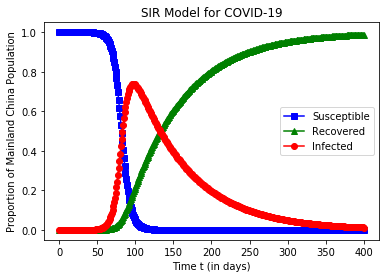

In [21]:
beta=0.19326803544604232
gamma=0.013917326219100322
TS=1
ND=400
I0=547.0/1339724852
S0=1-I0
INPUT = (S0, I0, 28.0/1339724852)

def diff_eqs(INP,t):
    '''The main set of equations'''
    Y=np.zeros((3))
    V = INP
    Y[0] = - beta * V[0] * V[1]
    Y[1] = beta * V[0] * V[1] - gamma * V[1]
    Y[2] = gamma * V[1]
    return Y   # For odeint

t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)
RES = spi.odeint(diff_eqs,INPUT,t_range)

#Ploting
pl.plot(RES[:,0], '-bs', label='Susceptible')  # I change -g to g--  # RES[:,0], '-g',
pl.plot(RES[:,2], '-g^', label='Recovered')  # RES[:,2], '-k',
pl.plot(RES[:,1], '-ro', label='Infected')
pl.legend(loc=0)
pl.title('SIR Model for COVID-19')
pl.xlabel('Time t (in days)')
pl.ylabel('Proportion of Mainland China Population')
pl.savefig('2.1-SIR-high.png', dpi=900) # This does, too
pl.show()